<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 120px">

# Before the Bubble Burst: Predicting Housing Prices in Ames, IA
### Fill out this cell as the project progresses, then move to README.md as technical report.

*Deval Mehta*

## Imports
To begin, we'll import all the necessary libraries for this project. We need:
* `numpy` for the ease of basic aggregate operations on data
* `pandas` to read our data into a DataFrame, clean it, engineer new features, and write it out to submission files.
* `matplotlib.pyplot` for basic plotting functionality
* `sklearn.compose` for our column transformer
* `sklearn.impute` for imputation methods
* `sklearn.linear_model`to write SLR and MLR models
* `sklearn.metrics` to evaluate our models
* `sklearn.model_selection` to perform train-test splitting
    * Note that we will opt to perform cross-validation with parallelization, rather than train-test splitting to write more accurate models.
* `sklearn.preprocessing`for data preprocessing and feature engineering tasks
* `seaborn` for more control over plot
* `warnings` to suppress many of the warnings `pandas` flags in response to things like using `inplace` arguments.

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-kit Learn module imports
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

## The Data
Our goal is to predict the price of homes listed for sale in Ames, IA, given information about the properties in question. This is a much wider dataset than any with which we have previously worked. The data consists of 80 columns, ranging from zoning classification to the quality and condition of various parts of the home and exterior. As we progress with analysis and modeling, we may find that we have to engineer new features to build a more accurate predictive model.

#### Original Features
The original dataset contains 79 non-index, non-price features, each introducing a different piece of information regarding a listing.

| Variable | Data Type | Description | Notes |
|---|---|---|---|
| MS SubClass | `int64` | The classification of the building | Codified to numbers; see the original data documentation for the cipher |
| MS Zoning | `string` | General zoning classification of the sale | Codified into strings; see the original data documentation for the cipher |
| Lot Frontage | `float64` | Linear feet of street connected to the property | |
| Lot Area | `int64` | Lot size in square feet | |
| Street | `string` | Type of road access to property | Gravel or Paved |
| Alley | `string` | Type of alley access to property | Gravel or Paved |
| Lot Shape | `string` | General shape of property | Degree of irregularity |
| Land Contour | `string` | Flatness of the property | Level, Banked, Hillside, or Low Depression |
| Utilities | `string` | Type of utilities available | Electric, Gas, Water, Sewer |
| Lot Config | `string` | Lot Configuration | Where on a block or in a neighborhood the lot lands |
| Land Slope | `string` | Slope of the property | Categorized from "gentle" to "severe" |
| Neighborhood | `string` | Physical locations within Ames city limits | |
| Condition 1 | `string` | Proximity to main road or railroad | |
| Condition 2 | `string` | Proximity to main road or railroad | if a second is present |
| Bldg Type | `string` | Type of dwelling | More modern classification than MS SubClass |
| House Style | `string` | Style of dwelling | Number of stories |
| Overall Qual | `int64` | Overal material and finish quality | Scale 1 - 10 |
| Overall Cond | `int64` | Overall condition rating | Scale 1 - 10 |
| Year Built | `int64` | Original construction date | |
| Year Remod/Add | `int64` | Remodel date | Same as construction date if no remodeling or additions |
| Roof Style | `string` | Type of roof | |
| Roof Matl | `string` | Roofing material | |
| Exterior 1st | `string` | Exterior covering on house | |
| Exterior 2nd | `string` | Exterior covering on house | if more than one material |
| Mas Vnr Type | `string` | Masonry veneer type | |
| Mas Vnr Area | `int64` | Masonry veneer area | |
| Exter Qual | `string` | Exterior material quality | Scale Poor to Excellent (six grades) |
| Exter Cond | `string` | Present condition of the material on the exterior | Same grading system as Exter Qual |
| Foundation | `string` | Type of foundation | |
| Bsmt Qual | `string` | Height of basement | |
| Bsmt Cond | `string` | General condition of basement | |
| Bsmt Exposure | `string` | Walkout or garden level basement walls | |
| BsmtFin Type 1 | `string` | Quality of basement finished area | |
| BsmtFin SF 1 | `int64` | Type 1 finished square footage | |
| BsmtFin Type 2 | `string` | Quality of second finished area (if present) | |
| BsmtFin SF 2 | `string` | Type 2 finished square feet | |
| Bsmt Unf SF | `int64` | Unfinished square feet of basement area | |
| Total Bsmt SF | `int64` | Total square feet of basement area | |
| Heating | `string` | Type of heating | |
| Heating QC | `string` | Heating quality and condition | |
| Central Air | `string` | Central air conditioning | |
| Electrical | `string` | Electrical system | |
| 1st Flr SF | `int64` | First floor square footage | |
| 2nd Flr SF | `int64` | Second floor square footage | if it exists |
| Low Qual Fin SF | `int64` | Low quality finished square footage | all floors |
| Gr Liv Area | `int64` | Above grade living area square footage | |
| Bsmt Full Bath | `int64` | Number of basement full bathrooms | |
| Bsmt Half Bath | `int64` | Number of basement half bathrooms | |
| Bedroom AbvGr | `int64` | Number of bedrooms above grade | |
| Kitchen AbvGr | `int64` | Number of kitchens above grade | |
| Kitchen Qual | `string` | Kitchen quality | |
| TotRms AbvGr | `int64` | Total rooms above grade | does not include bathrooms |
| Functional | `string` | Home functionality rating | |
| Fireplaces | `int64` | Number of fireplaces | |
| Fireplace Qu| `string` | Fireplace quality | |
| GarageType | `string` | Garage type and location | |
| Garage Yr Blt | `float64` | Year garage was built | |
| Garage Finish | `string` | Interior finish of the garage | |
| Garage Cars | `int64` | Car capacity of garage | |
| Garage Area | `int64` | Square footage of garage | |
| Garage Qual | `string` | Garage quality | |
| Garage Cond | `string` | Garage condition | |
| Paved Drive | `string` | Paved driveway | |
| Wood Deck SF | `int64` | Wood deck area in square feet | |
| Open Porch SF | `int64` | Open porch area in square feet | |
| 3Ssn Porch | `int64` | Three season porch area in square feet | |
| Screen Porch | `int64` | Screen porch area in square feet | |
| Pool Area | `int64` | Pool area in square feet | |
| Pool QC | `string` | Pool quality | |
| Fence | `string` | Fence quality | |
| Misc Feature | `string` | Miscellaneous feature not covered in other categories | |
| Misc Val | `int64` | Dollar value of miscellaneous feature | |
| Mo Sold | `int64` | Month sold | |
| Yr Sold | `int64` | Year sold | |
| Sale Type | `string` | Type of sale | |
| Sale Price | `int64` | The property's sale price in dollars | This is our response variable for our models |

We can clearly identify some redundant information here already, which will allow us to pare the data down a bit. The "overall" numbers will all be aggregates or combinations of the individual values, so we can count them out in our analysis. We will also want to convert our "sliding scale" variables to a numeric data type, then convolve some of them. In particular, the area of something is likely to interact with its quality. There are many missing values in the data, as will be seen below. We will want to reasonably impute as many of them as possible.

Regarding the missing values, it seems many of the categorical features have been encoded as "NA" to mean that no relevant property exists. This will be relatively easy to impute if we have a common way to refer to such an incident in mind that cannot be overwritten by a null-type.

In [2]:
# Read in the training and test datasets
ames_training = pd.read_csv('../datasets/train.csv')
ames_validation = pd.read_csv('../datasets/test.csv')

In [3]:
# Check data types and number of non-null values in the training data.
ames_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Establishing a Baseline
We should create a baseline prediction before considering anything else about the data. We see that one of our features is `Overall Quality`, which is likely an aggregate of all of the other `quality` features in the dataset. We have already generated a baseline relying on this feature as the only predicate in breakfast hour, which we add here for completeness. To ensure that the baseline is the same across the cohort, we select a random seed here.

In [4]:
# Assign predicates and response
X = ames_training[['Overall Qual']]
y = ames_training['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Use a simple imputer to fill in null values
si = SimpleImputer()

# Transform the split data
X_train_si = si.fit_transform(X_train)
X_test_si = si.transform(X_test)

# Instantiate
lr = LinearRegression()

# Fit on training data!
lr.fit(X_train_si, y_train)

# Predict on the training and testing data
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

In [5]:
# Score the model on the training and testing data
print(f'RMS Error on the training set: {rmse(y_train, y_train_preds)}')
print(f'RMS Error on the testing set: {rmse(y_test, y_test_preds)}')
print(f'R^2 on the training set: {lr.score(X_train_si, y_train)}')
print(f'R^2 on the testing set: {lr.score(X_test_si, y_test)}')

RMS Error on the training set: 48156.64923160143
RMS Error on the testing set: 45571.38745636498
R^2 on the training set: 0.6333219308225757
R^2 on the testing set: 0.6617682426512024


Our baseline does not perform remarkably well, with an $R^2$ of about 0.63 on the training data, suggesting that only 63\% of the variability in the data can be accounted for due to the features of the training set. That said, the model is not overfit, as the testing $R^2$ is comparable to the testing $R^2$.

In [6]:
# Fit on the whole training set
lr.fit(X,y)

# Make predictions on the validation set
preds = lr.predict(ames_validation[['Overall Qual']])

# Save the predictions to a data frame of the same size as the validation set
predictions = ames_validation.copy()
predictions['SalePrice'] = preds

# Format the predictions to match the submission format for Kaggle
predictions = predictions[['Id', 'SalePrice']]
predictions.set_index('Id', inplace = True)

# Save to a .csv file
predictions.to_csv('../outputs/prediction_on_quality.csv')

With our baseline in tow, we can return to the data.

## Native Numeric Variables - A Preliminary Model

Broadly speaking the features can be split into 12 groups, based on the information in the data dictionary, which provide insights into similar or related aspects of a given house:

* Identifying Information and Access (ID, PID, Lot Frontage, Street, Alley) - These will likely have very little impact on housing prices
* Building Classification (MS SubClass, Bldg Type, House Style, Year Built, Year Remodeled, Roof Style)
* Lot (Lot Area, Lot Shape, Land Contour, Lot Config, Land Slope)
* Location (Neighborhood, Condition 1, Condition 2)
* General (Overall Quality, Overall Condition)
* Exterior (Exterior 1st, Exterior 2nd, Exterior Quality, Exterior Condition, Paved Driveway, Miscellaneous Feature, Miscellaneous Value)
* Structure (Type of Foundation, Roof Material, Masonry Veneer Type, Masonry Veneer Area, Utilities, Heating, Heating Quality, Central Air, Electrical)
* Basement (Basement Quality, Basement Condition, Basement Exposure, Basement Finish Type 1, Basement Finish Type 2, Basement Square Footage Type 1, Basement Square Footage Type 2, Basement Unfinished Square Footage, Total Basement Square Footage)
* Rooms Above Grade (Total Rooms Above Grade, Bedrooms Above Grade, Kitchens Above Grade, Kitchen Quality)
* Fireplaces (Fireplaces, Fireplace Quality)
* Garages (Garage Type, Garage Year Built, Garage Finish, Garage Cars, Garage Area, Garage Quality, Garage Condition)
* Yard (Wood Deck Square Footage, Open Porch Square Footage, 3 Season Porch, Screen Porch, Pool Area, Pool Quality)

We will check how well many features correlate to our desired response (price), but before we do that, we can pare down the data a bit. The "quality" and "condition" features where they both exist are likely to provide the same information about an attribute. As such, we can maintain on the condition features and process them as numeric types, translating the "sliding scale" of strings to a 0-5 scale of ints. Where required, we can adjust the top end of the scale to be the number of available options.

Before we can do that, we will have to change all the "NA" entries. The consequences of simply dropping the data are catastrophic.

In [7]:
ames_training.shape, ames_training.dropna().shape

((2051, 81), (0, 81))

As we can clearly see here, dropping all null values would leave us with no data.

In [8]:
ames_validation.dropna().shape

(0, 80)

The same is true of the testing data. We will have to selectively drop columns and impute otherwise. To minimize the number of columns we need to drop, let's first impute where we can. We'll replace the NaNs in categorical columns with the initialism "NV" for "No Value." That should get around the encoding issue present.

In [9]:
ames_training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In order to effectively impute the data, we will have to treat categorical and numerical variables separately. There are only three different data types present in the data: `int64`, `float64`, and `object`. We can filter the data frame by `object` type columns to gather all the categorical data and impute it before transforming the "condition" columns as we previously mentioned. We should also impute the testing data whenever we impute the training data, to ensure that our predictions remain accurate. If the withheld "secret" data is not cleaned, we expect our score to be worse than would be accurate, as a validation algorithm would not necessarily clean data the way we are.

In [10]:
categorical_columns = ames_training.select_dtypes('object').columns
for column in categorical_columns:
    ames_training[column].replace(np.nan, "NV", inplace = True)
    ames_validation[column].replace(np.nan, "NV", inplace = True)

ames_training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NV,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NV,NV,NV,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NV,NV,NV,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NV,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NV,NV,NV,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NV,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NV,NV,NV,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NV,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NV,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NV,NV,NV,0,3,2010,WD,138500


Since we're interested in performing a predictive analysis via linear regression, we ought to clean up the numerical variables as well. While we do that, we can do some preliminary EDA to see which variables we might pick for our first analysis, beyond a baseline. Let's have a look at the "state of the NaNs."

In [11]:
ames_training.select_dtypes(include = ['int64', 'float64']).isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

11 of our numeric columns contain null values. With this information, let's do some initial EDA to see how well each of the numeric variables (as they are) correlate to `SalePrice`. We can use this information to decide whether it might be worth imputing null-values in some of these columns. To check, we'll create a heatmap, much like we did in Lesson 305: Model Workflow

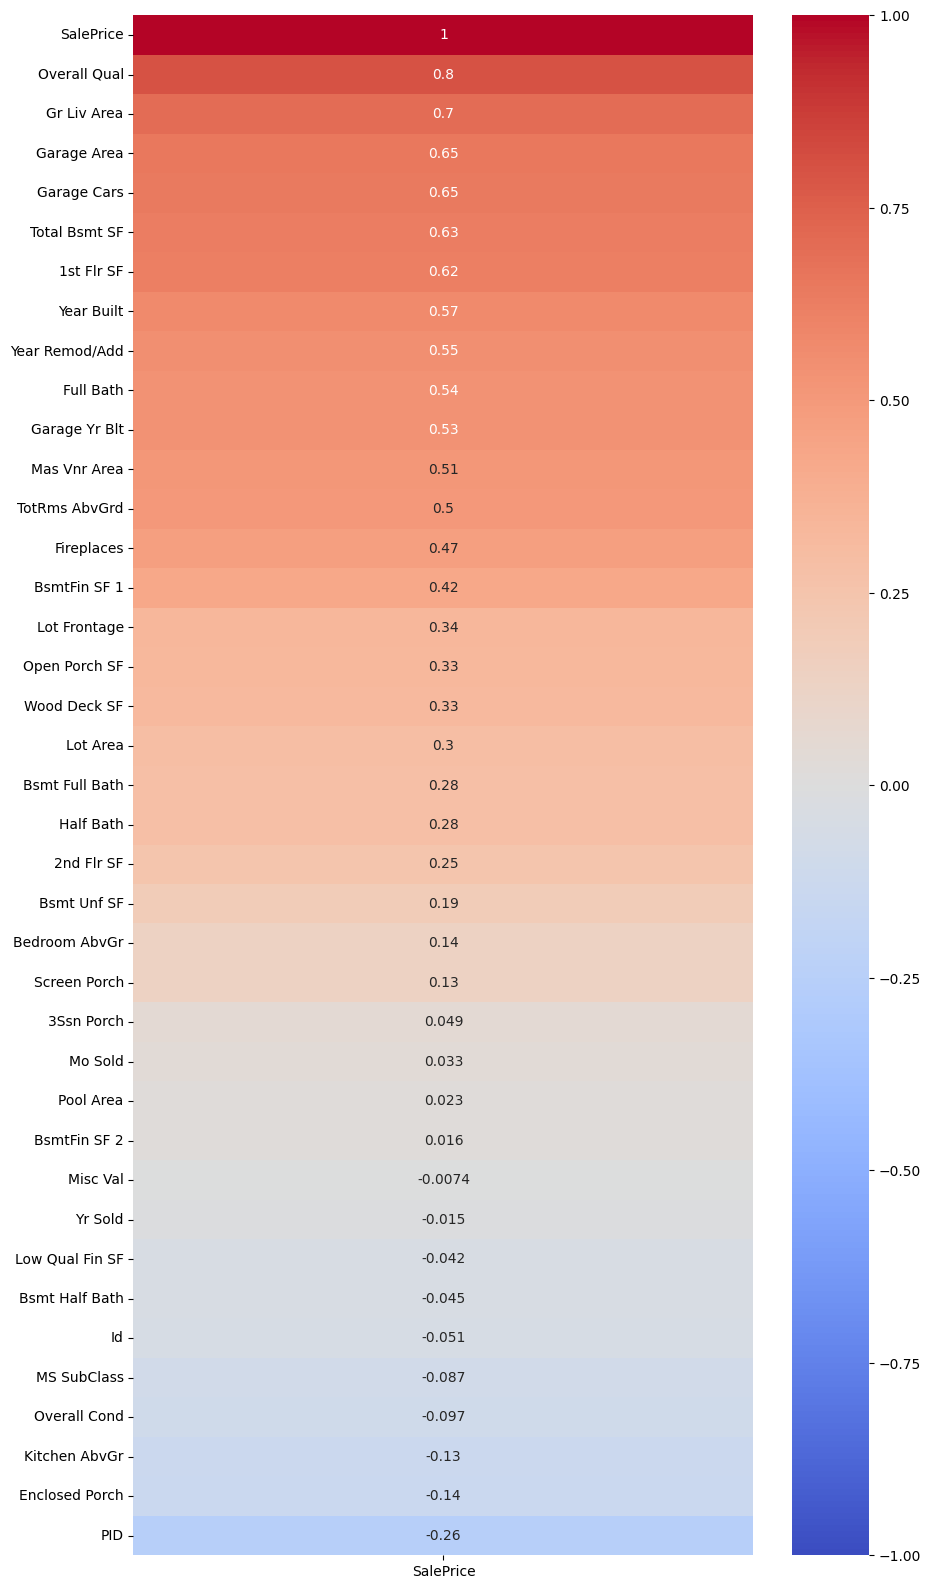

In [12]:
plt.figure(figsize = (10, 20))
sns.heatmap(ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm', annot = True)
plt.savefig('../images/preliminary_saleprice_heatmap.png', dpi = 300);

There appears to be no easily apparent "cutoff" for what we might consider to be highly correlated. We can take a token from Principal Component Analysis (thanks to DSB Lead Instructor Matt Brems for mentioning this well in advance of our PCA lesson) to determine which features are worth considering for a regression analysis. The "elbow method" advocates plotting the features (sorted by correlation) on line plot or bar chart and identifying sharp drops between items. Where "the elbow bends," we would call our cutoff.

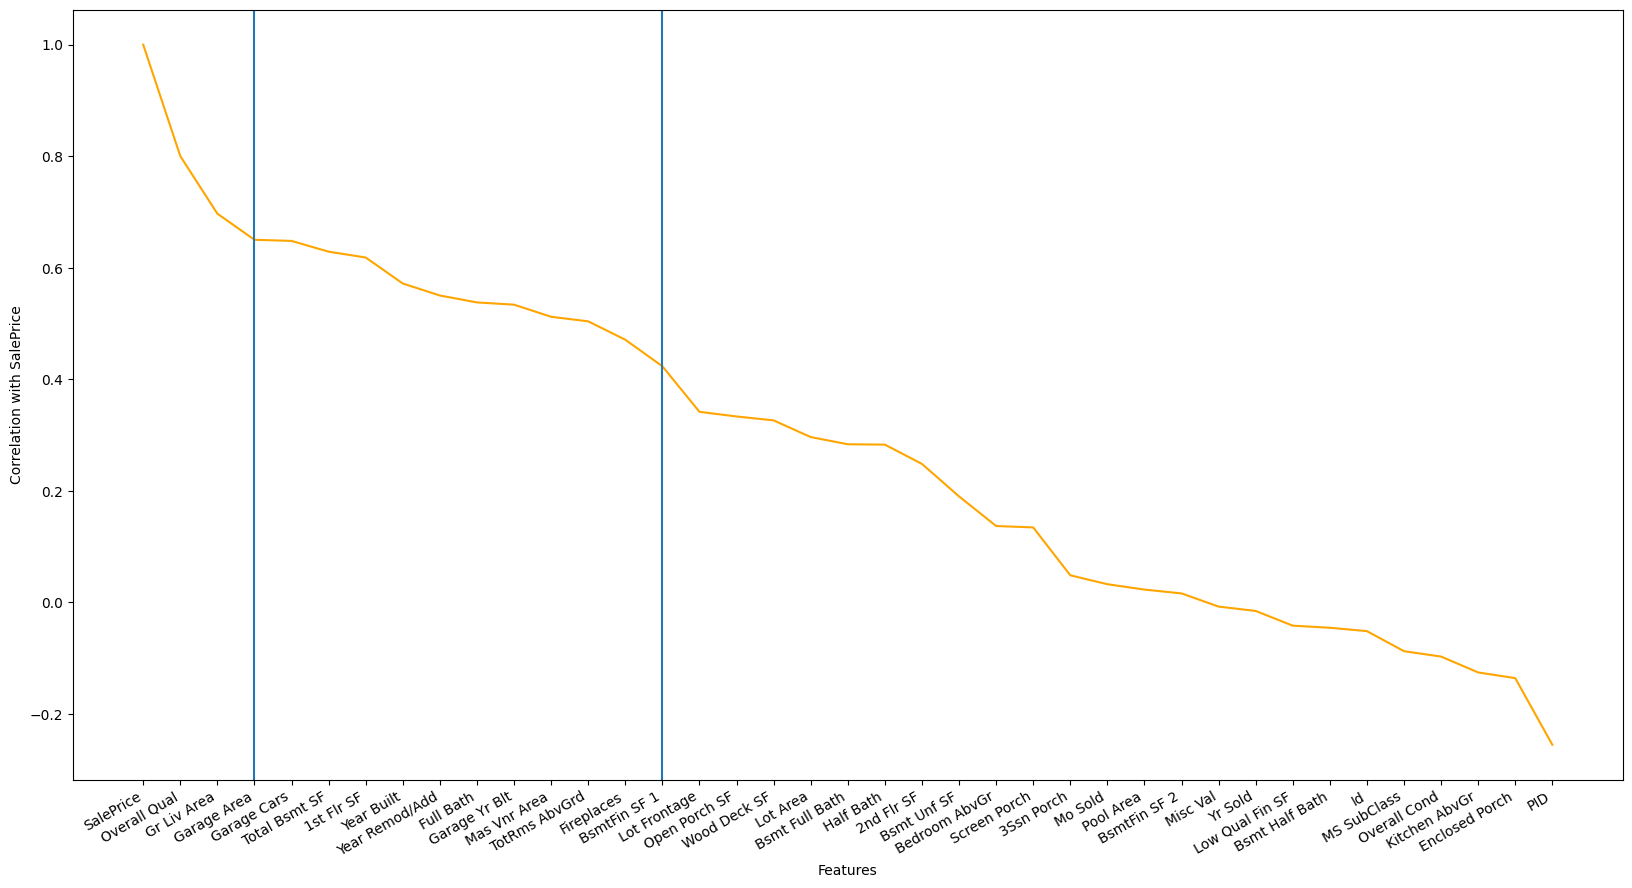

In [13]:
plt.figure(figsize = (20,10))
plt.plot(ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).index,
         ames_training.corr(numeric_only = True)[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
         c = 'orange')
plt.axvline(x = 3)
plt.axvline(x = 14)
plt.xticks(rotation = 30, ha = 'right')
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')
plt.savefig('../images/elbow_method.png', dpi = 300);

Ignoring the initial "elbow" at `Overall Qual` which occurs for the obvious reason of nothing correlating as well to `SalePrice` as it does to itself, we have a very "early elbow" at the `Garage Area` feature, but we can imagine that a multiple linear regression model using only three features from a set of 79 would likely be terribly underfit. Instead, we look for our second "elbow," which we identify at the `BsmtFin SF 1` feature, denoting the area of the "1st" finished part of the basement. Note the steep descent from this feature to `Lot Frontage`. Choosing this to be the cutoff for our first multiple linear regression model provides us with 14 features of 79 to play with. Normally, we would seek another "elbow" to filter for strongly anti-correlated features, but seeing as the mostly highly anti-correlated feature has a correlation coefficient of -0.26 (compare that against the 0.42 for our "strong" cutoff), that seems unnecessary here. Incidentally, the only features in our restricted list with null values are now:
* `Garage Area`
* `Garage Cars`
* `Total Bsmt SF`
* `Garage Yr Blt`
* `Mas Vnr Area`
* `BsmtFin SF 1`

Thankfully, most of these have only 1 null value, so we will be able to identify the relevant rows and impute them as necessary.

In [14]:
still_null_corr_columns = ['Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Yr Blt', 'Mas Vnr Area', 'BsmtFin SF 1']
for column in still_null_corr_columns:
    print(column)
    display(ames_training[ames_training[column].isnull()][['PID']])

Garage Area


,PID
1712,910201180


Garage Cars


,PID
1712,910201180


Total Bsmt SF


,PID
1327,903230120


Garage Yr Blt


,PID
28,911103060
53,923226250
65,923202134
79,910201050
101,905476170
...,...
1991,923204150
2010,911175410
2027,535456010
2039,923228220


Mas Vnr Area


,PID
22,528142010
41,528110050
86,531371050
212,528458020
276,908130020
338,528458150
431,907251090
451,528439010
591,533208040
844,533208030


BsmtFin SF 1


,PID
1327,903230120


Two rows appear consistently here: PID 910201180 and 903230120. Let's inspect these two rows individually.

In [15]:
ames_training[ames_training['PID'] == 910201180]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NV,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NV,Detchd,NaN,NV,NaN,NaN,NV,NV,Y,174,0,212,0,0,0,NV,MnPrv,NV,0,3,2007,WD,150909


In [16]:
ames_training[ames_training['PID'] == 903230120]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NV,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NV,0.0,TA,TA,PConc,NV,NV,NV,NV,NaN,NV,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NV,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NV,MnPrv,NV,0,4,2008,ConLD,79000


The null values in our columns of interest are not isolated, as they have other corresponding information. For instance, listing 910201180 has a detached garage, with negligible information regarding it available. In a situation like this, our best option is to assume that the missing data falls within the expectation of our eventual model and simply delete it: we will *hope* that it is Missing Completely at Random (MCAR). In fact, in the interest of time and producing a preliminary model, we will simply remove all of the rows with a null value in any of our columns of interest.

In [17]:
ames_training.dropna(subset = still_null_corr_columns, inplace = True)

Note that we **cannot** do this for our testing data. Kaggle submissions require that there are precisely 878 rows of data, so we must impute the validation data. In the interest of time, we will impute each missing numerical values with 0, but ideally, we would have instantiated and used Simple Imputation to replace the missing values with the mean, assuming that the validation set is also MCAR.

In [18]:
ames_validation.replace(np.nan, 0, inplace = True)

In [19]:
ames_training.shape, ames_validation.shape

((1915, 81), (878, 80))

## Fitting our Preliminary Model
We've already fit our baseline model to a simple linear regression. This preliminary multiple linear regression model aims to predict the price of a house for sale in Ames using only the native numeric columns in the dataset. We perform a train-test split to generate this prediction. Ideally we would have liked to use k-fold cross validation with the typical 5 folds and shuffling. We could have refined our model further by attempting to optimize over the number of folds.

In [20]:
# Specify X and y
X = ames_training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
                   'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
                   'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
                   'Fireplaces', 'BsmtFin SF 1']]
y = ames_training['SalePrice']

# Instantiate our linear regression model
mlr_basic = LinearRegression()

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
mlr_basic.fit(X_train, y_train)

LinearRegression()

Now that our model has been fit, let us score the model. We'll calculate both the root-mean-squared error and the $R^2$. The former will provide an indicator of how we expect Kaggle to score our model and the latter an attribution of error due to bias and variance.

In [21]:
y_train_preds = mlr_basic.predict(X_train)
y_test_preds = mlr_basic.predict(X_test)

print(f'RMS Error on the training set: {rmse(y_train, y_train_preds)}')
print(f'RMS Error on the testing set: {rmse(y_test, y_test_preds)}')
print(f'R^2 on the training set: {mlr_basic.score(X_train, y_train)}')
print(f'R^2 on the testing set: {mlr_basic.score(X_test, y_test)}')

RMS Error on the training set: 34084.732725229354
RMS Error on the testing set: 37865.24858468558
R^2 on the training set: 0.8149672495440337
R^2 on the testing set: 0.7596211179863437


According to our $R^2$ scores, roughly 80% of the variability in the data can be explained by our features and our model is relatively well-fit, since the testing and training $R^2$ scores are similar (the difference of the two is less than $10\%$ of the training $R^2$ score.

We would expect that this model will score around 35,000 on Kaggle, meaning that the prices predicted per house will be within $35,000 of the true value. Considering housing prices in 2008, this falls within 10% to 35% of the middle 50% of homes [citation needed]. Let's consider this visually as well.

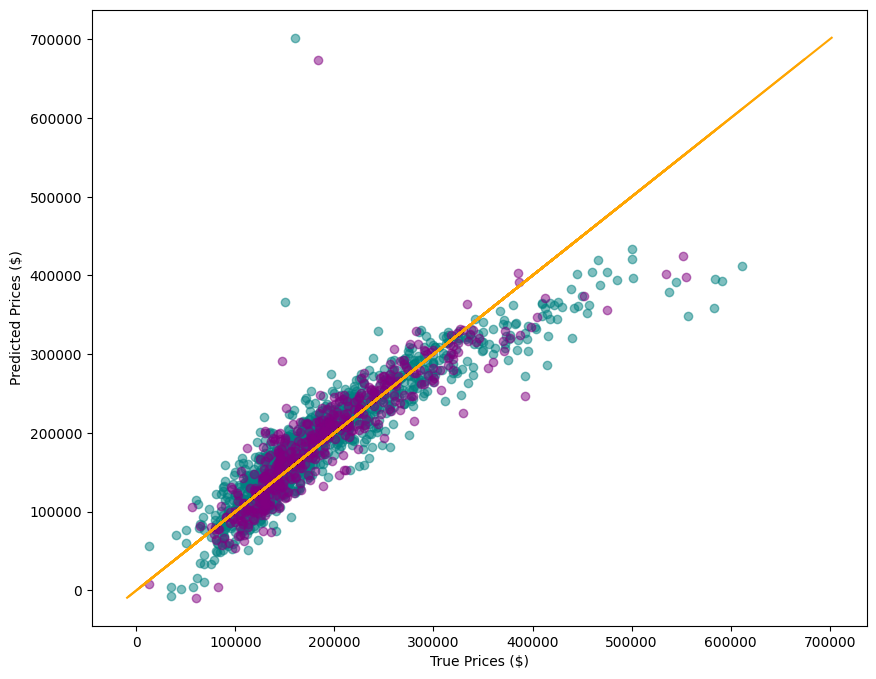

In [22]:
ys = np.concatenate([y_train, y_test])
y_preds = np.concatenate([y_train_preds, y_test_preds])

plt.figure(figsize = (10,8))
plt.scatter(y_train, y_train_preds, alpha = 0.5, c = 'teal')
plt.scatter(y_test, y_test_preds, alpha = 0.5, c = 'purple')
plt.plot([ys, y_preds], [ys, y_preds], color = 'orange')
plt.xlabel('True Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.savefig('../images/preliminary_true_vs_predicted.png', dpi = 300);

As we can see, most of our value-prediction pairs lie quite close to the line of equality. In principle, we could happily stop here, but we know we can do better. Let's make our Kaggle submission and consider a more robust model.

In [23]:
# Fit against the whole training set
mlr_basic.fit(X,y)

# Predict using model
preds = mlr_basic.predict(ames_validation[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
                   'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
                   'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
                   'Fireplaces', 'BsmtFin SF 1']])

In [24]:
predictions = ames_validation.copy()
predictions['SalePrice'] = preds
predictions = predictions[['Id', 'SalePrice']]

In [25]:
predictions.set_index('Id', inplace = True)
predictions.to_csv('../outputs/prediction_on_native_numerical_features.csv')

## Preparing a More Robust Model

Let us return to the *ordinal* categorical features. Rather than one-hot encoding all of the categorical features, we see that many of them are "sliding scales." In particular, we turn our attention to `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Kitchen Qual`, `Fireplace Qu`, `Garage Qual`, `Garage Cond`, and `Pool QC`. Most of these features scale from "NV" (no value) to "Ex" (Excellent). We define a dictionary, as we did in breakfast hour on Friday, to convert all of these to numerical data types so that we might use them to build another model that (we hope) will perform better.

In [26]:
ordinal_mapping = {
    'NV': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
}

# Define ordinal columns
ordinal_columns = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond','Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']

for column in ordinal_columns:
    ames_training[column] = ames_training[column].map(ordinal_mapping)
    ames_validation[column] = ames_validation[column].map(ordinal_mapping)

Each of these "quality" features likely contribute to the `Overall Qual` feature and we can imagine that the "condition" features is practically colinear to the quality feature to which it corresponds. To verify, let us create another heatmap against `Overall Qual`

In [27]:
ames_training_qual_and_cond = ames_training[['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                   'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Overall Qual', 'Overall Cond']]

ames_training_qual_and_cond.isnull().sum()
# ames_training_qual_and_cond.corr(numeric_only = True)[['Overall Qual']].sort_values(by = 'Overall Qual', ascending = False)

Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Kitchen Qual      0
Fireplace Qu      0
Garage Qual       0
Garage Cond       0
Pool QC           0
Overall Qual      0
Overall Cond      0
dtype: int64

We note that three of our ordinal features still have a different scale than the rest: `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`. As such, we will have to determine their possible values. Let us inspect the available values on these columns and create new ordinal mappings accordingly.

In [28]:
addl_ordinals = ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for column in addl_ordinals:
    print(f'Column: {column}\nValues: {ames_training[column].unique()}')

Column: Bsmt Exposure
Values: ['No' 'Gd' 'Av' 'NV' 'Mn']
Column: BsmtFin Type 1
Values: ['GLQ' 'Unf' 'ALQ' 'Rec' 'NV' 'BLQ' 'LwQ']
Column: BsmtFin Type 2
Values: ['Unf' 'Rec' 'NV' 'BLQ' 'GLQ' 'LwQ' 'ALQ']


The two "Finished Basement" features have the same scale. Lucky for us, we need only write two more mappings and apply them.

In [29]:
bsmtfin_mapping = {
    'NV': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

bsmtfin_vars = ['BsmtFin Type 1', 'BsmtFin Type 2']

for column in bsmtfin_vars:
    ames_training[column] = ames_training[column].map(bsmtfin_mapping)
    ames_validation[column] = ames_validation[column].map(bsmtfin_mapping)

In [30]:
bsmtexp_mapping = {
    'NV': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}
ames_training['Bsmt Exposure'] = ames_training['Bsmt Exposure'].map(bsmtexp_mapping)
ames_validation['Bsmt Exposure'] = ames_validation['Bsmt Exposure'].map(bsmtexp_mapping)

With all of our ordinal features adequately recoded, let us see how well they correlate:

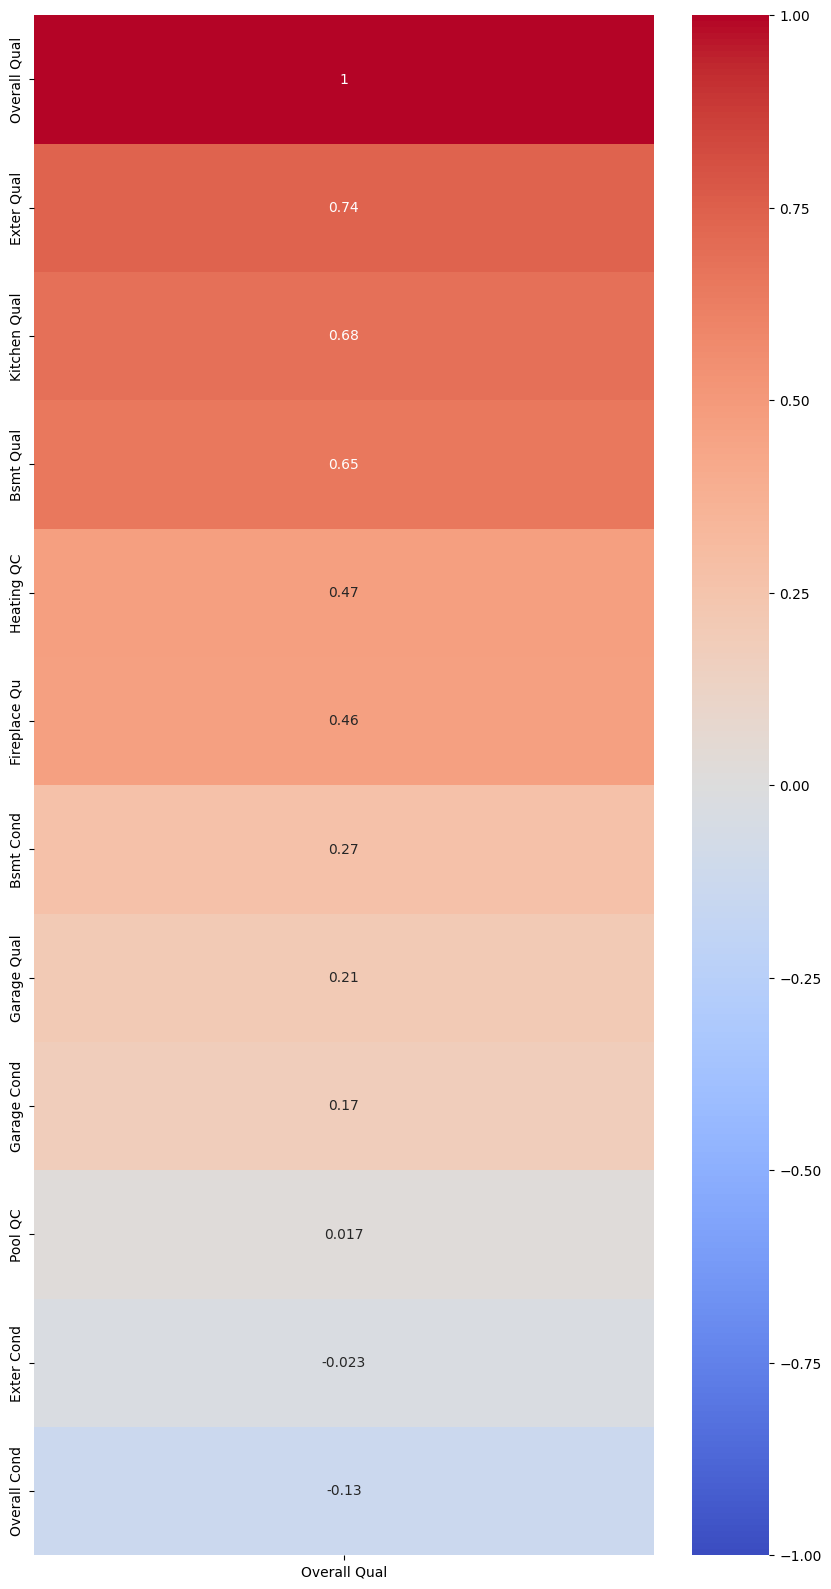

In [31]:
plt.figure(figsize = (10, 20))
sns.heatmap(ames_training_qual_and_cond.corr(numeric_only = True)[['Overall Qual']].sort_values(by = 'Overall Qual', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm', annot = True)
plt.savefig('../images/quality_heatmap.png', dpi = 300);

As we might suspect, the features that are present in most Ames homes (an exterior, a kitchen, and a basement) have quality ratings that contribute heavily to the overall quality, but the remaining features (anti)correlate weakly. Perhaps we may *not* have expected that the conditions deteriorate as the quality improves. We suspect something is going wrong here, so will neglect the condition features in our analysis for the sake of time. 

We can now construct a new model based on the native numeric features we isolated earlier, along with the ordinal features that strongly correlate to `Overall Qual`. To avoid colinearity issues, we will exclude `Overall Qual`. Further, we should consider this time whether any of of the features we have selected are correlated with each other. To check, we will consider both a heatmap of correlations and a pairplot.

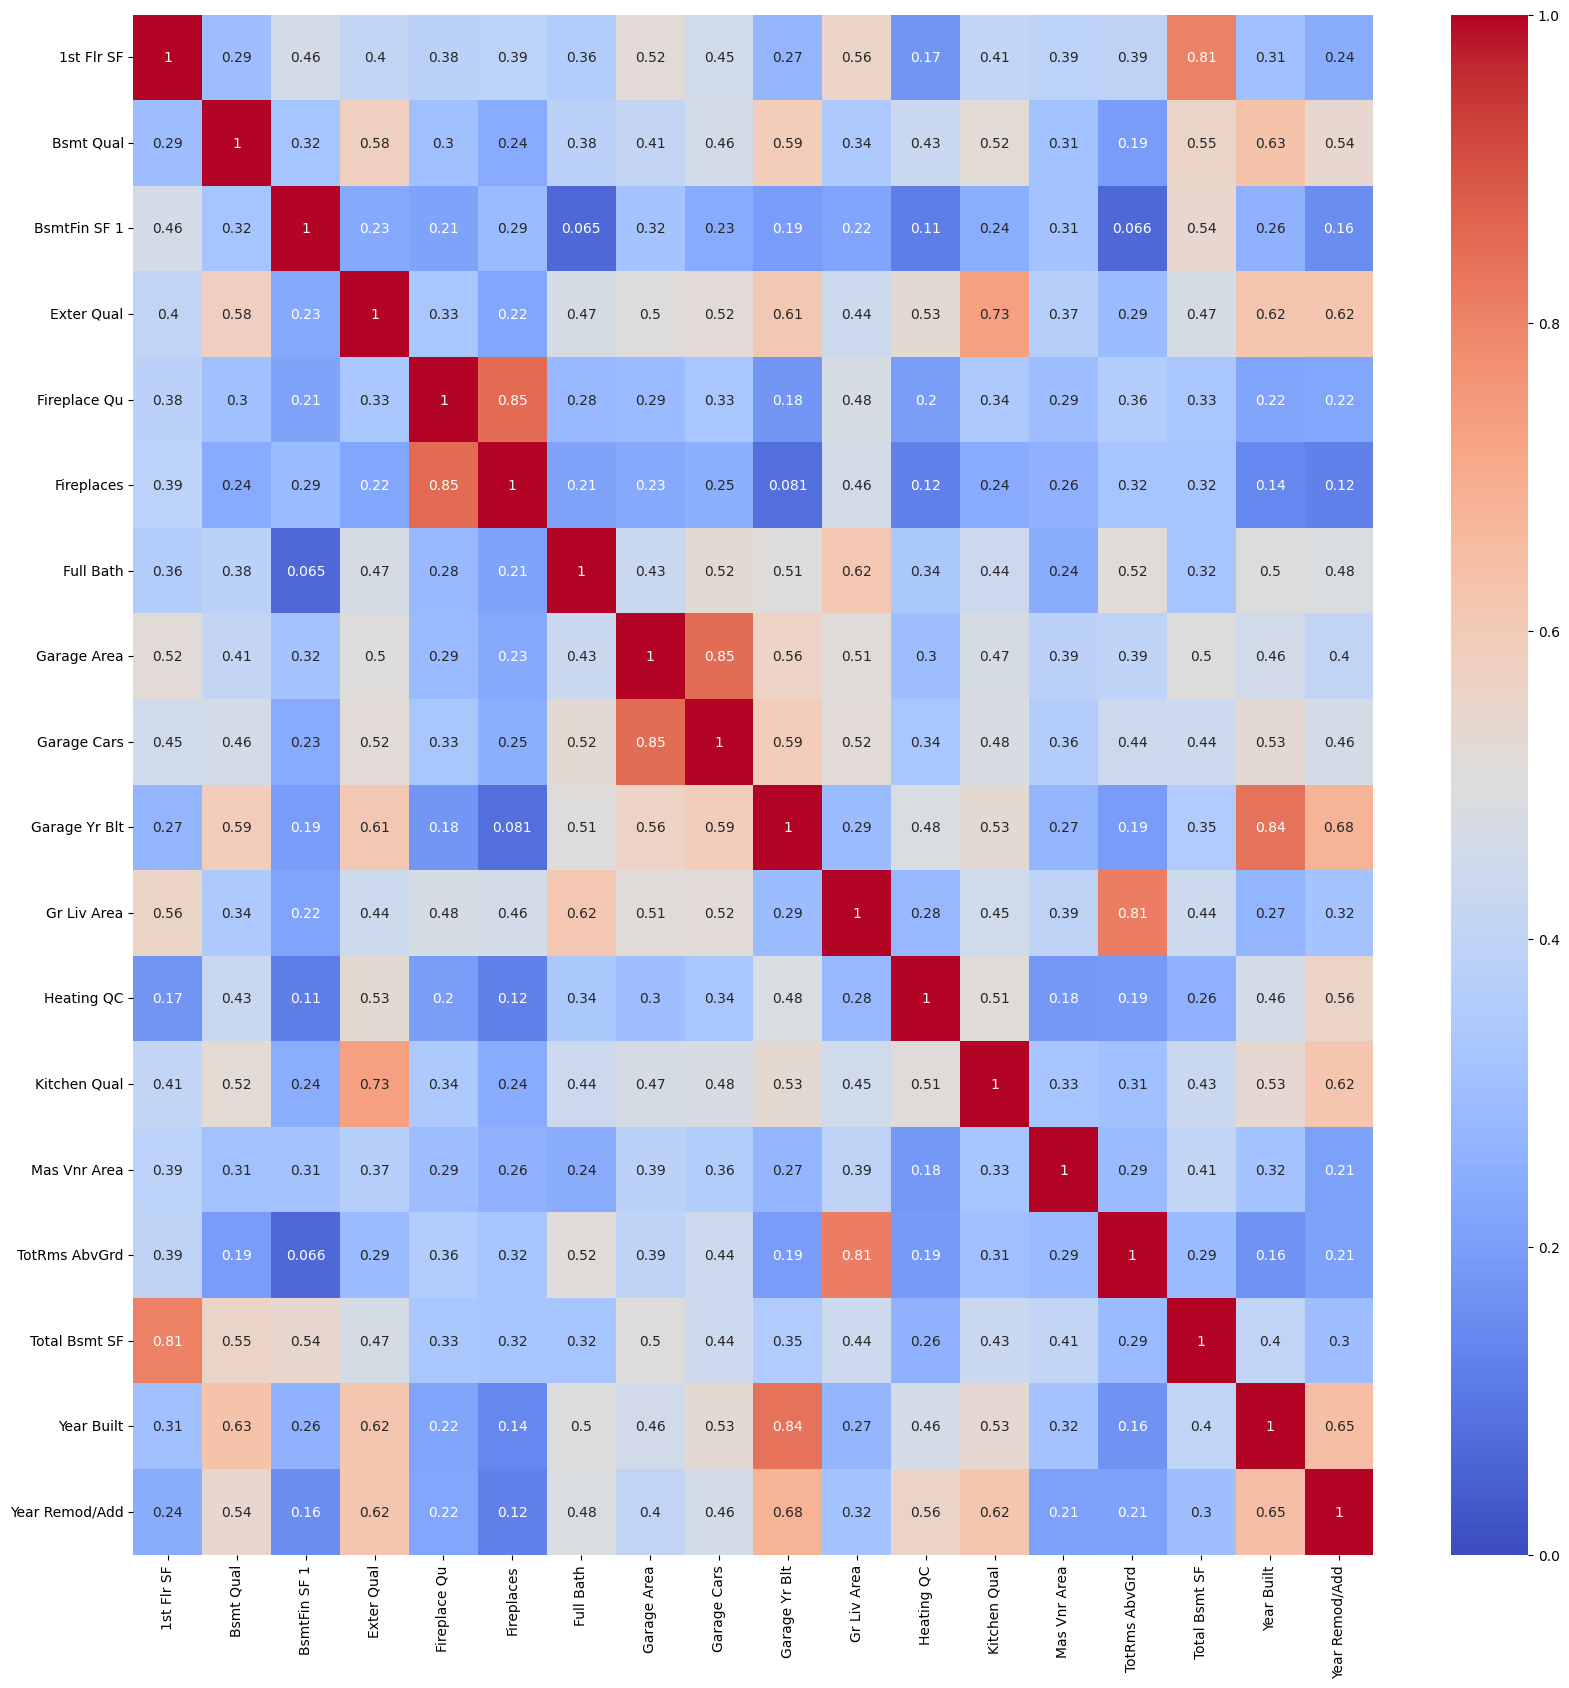

In [32]:
highly_corr_vars = sorted(['Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
                   'Fireplaces', 'BsmtFin SF 1', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC', 'Fireplace Qu'])

plt.figure(figsize = (20, 20))
sns.heatmap(ames_training[highly_corr_vars].corr(numeric_only = True),
            vmin = 0,
            vmax = 1,
            cmap = 'coolwarm', annot = True)
plt.savefig('../images/num_and_ord_heatmap.png', dpi = 300);

So there is some strong colinearity! The features that correlate highly to each other seem obvious:
* Fireplace quality and the number of fireplaces are related; homes with multiple fireplaces tend to maintain them better
* Garage area and garage cars are colinear; more cars require more space
* The garage and home tend to be built around the same year
* The basement and first floor have nearly identical areas
* Homes that have been more recently remodeled have higher quality across the board and many homes were never remodeled
* Homes with higher quality kitchens also tend to have higher quality exteriors
* A higher number of rooms above grade typically means that the living area above grade is also higher.

Let's plot the features that interact in pairs against each other and see what kind of relationship they have.

In [33]:
highly_colin_vars = ['1st Flr SF', 'Total Bsmt SF', 'Exter Qual', 'Kitchen Qual', 'Fireplace Qu', 'Year Remod/Add', 'Fireplaces',
                     'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Year Built', 'Gr Liv Area', 'TotRms AbvGrd', ]

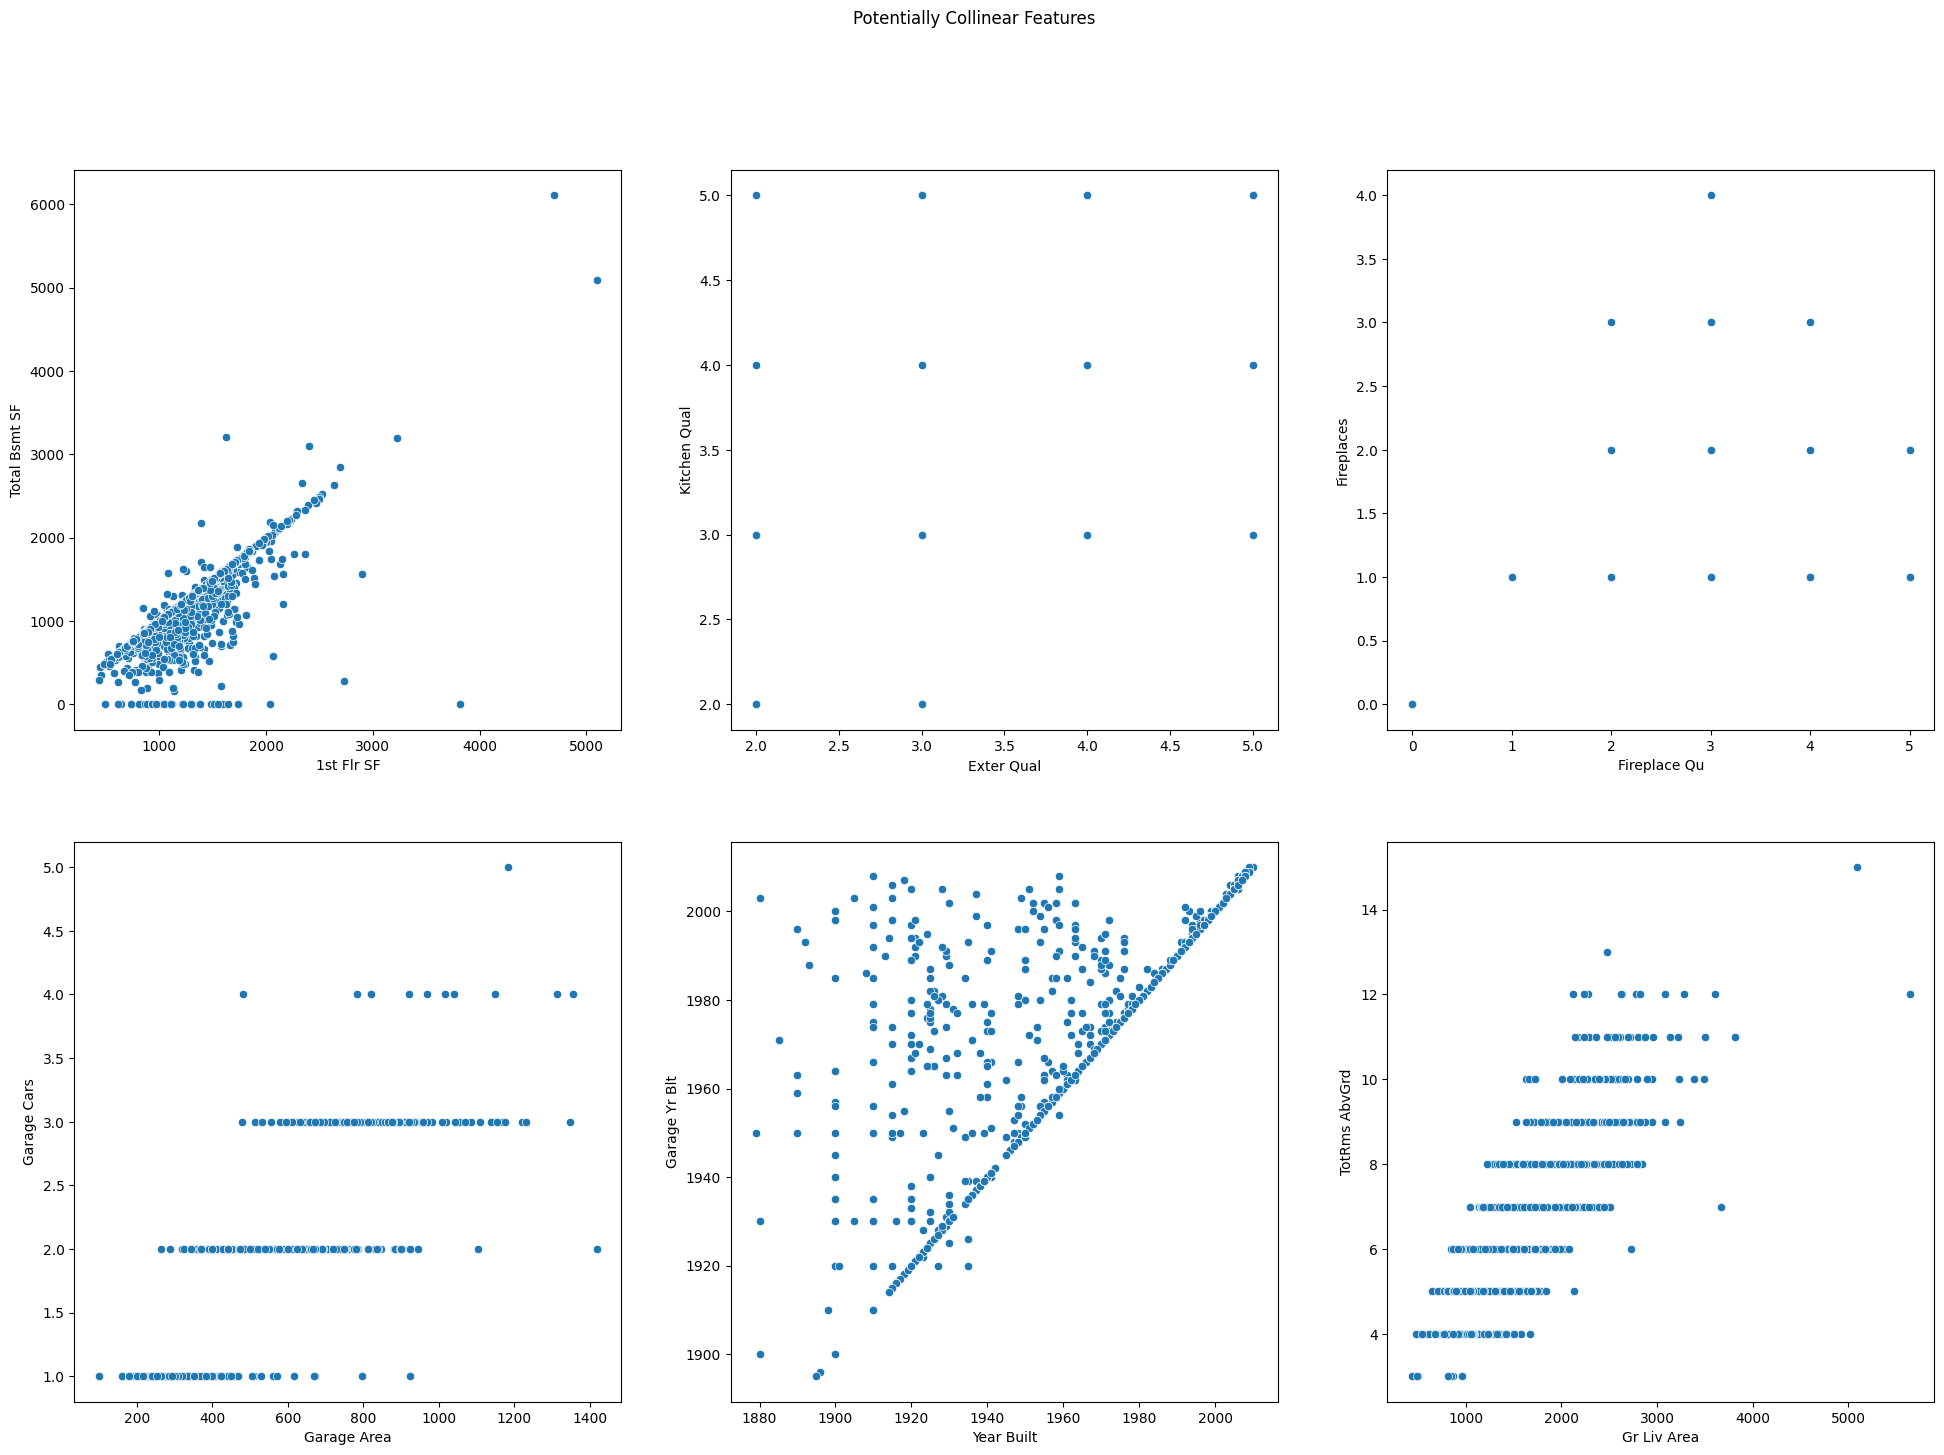

In [34]:
# Use sns.pairplot() to check visually for colinearity or a polynomial dependence
plt.figure(figsize = (24,16))
plt.suptitle('Potentially Collinear Features')
plt.subplot(2,3,1)
sns.scatterplot(data = ames_training, x = '1st Flr SF', y = 'Total Bsmt SF')
plt.subplot(2,3,2)
sns.scatterplot(data = ames_training, x = 'Exter Qual', y = 'Kitchen Qual')
plt.subplot(2,3,3)
sns.scatterplot(data = ames_training, x = 'Fireplace Qu', y = 'Fireplaces')
plt.subplot(2,3,4)
sns.scatterplot(data = ames_training, x = 'Garage Area', y = 'Garage Cars')
plt.subplot(2,3,5)
sns.scatterplot(data = ames_training, x = 'Year Built', y = 'Garage Yr Blt')
plt.subplot(2,3,6)
sns.scatterplot(data = ames_training, x = 'Gr Liv Area', y = 'TotRms AbvGrd')
plt.savefig('../images/potentially_collinear_features.png', dpi = 300);

A few takeaways here:
* The first floor and basement areas are roughly colinear, so we will opt to include only the first floor area
* The year the home and garage were built are also highly colinear, so we will opt to include only the year the home was built.
* The living area above grade and the total number of rooms above grade are highly colinear as well, so we will opt to include on the living area above grade.
* The remaining plots are all too sparse to call them colinear in any sense. Perhaps they will serve our model better as interactions. We will attempt to add interaction terms after running a model without interactions first.

With this information in tow, let us redefine the set of columns we will use for our next model.

Time to define our new set of interesting features and fit, test, and score our model!

In [35]:
# Enumerate columns of interest
num_and_ord_features = ['Gr Liv Area', 'Garage Area', 'Garage Cars', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area',
                        'Fireplaces', 'BsmtFin SF 1', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC', 'Fireplace Qu']

# Specify X and y
X = ames_training[num_and_ord_features]
y = ames_training['SalePrice']

# Instantiate our linear regression model
mlr_num_and_ord = LinearRegression()

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
mlr_num_and_ord.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_preds = mlr_num_and_ord.predict(X_train)
y_test_preds = mlr_num_and_ord.predict(X_test)

print(f'RMS Error on the training set: {rmse(y_train, y_train_preds)}')
print(f'RMS Error on the testing set: {rmse(y_test, y_test_preds)}')
print(f'R^2 on the training set: {mlr_num_and_ord.score(X_train, y_train)}')
print(f'R^2 on the testing set: {mlr_num_and_ord.score(X_test, y_test)}')

RMS Error on the training set: 33341.99033847058
RMS Error on the testing set: 38476.66802884528
R^2 on the training set: 0.8082608709774535
R^2 on the testing set: 0.7993563800536506


We have some mild improvement on our preliminary model. Rather than an RMSE around \\$35,000, we now expect our Kaggle submission to score around an RMSE of \\$33,500. Once again, we can attribute about 80\% of the variability in the model to the training features, but the model is not overfit, since it performs comparably on the testing data and training data. We can confirm this visually as well.

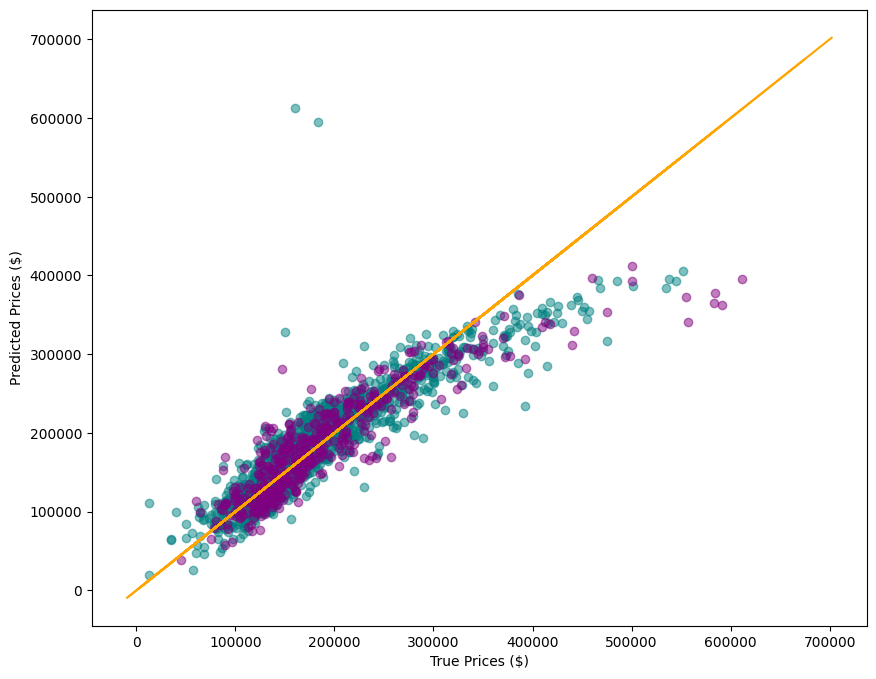

In [37]:
plt.figure(figsize = (10,8))
plt.scatter(y_train, y_train_preds, alpha = 0.5, c = 'teal')
plt.scatter(y_test, y_test_preds, alpha = 0.5, c = 'purple')
plt.plot([ys, y_preds], [ys, y_preds], color = 'orange')
plt.xlabel('True Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.savefig('../images/num_and_ord_true_vs_predicted.png', dpi = 300);

Overall, the plot looks incredibly similar to our first attempt. It is becoming clearer now that we should expect to do some scaling to improve our model's performance. For now, we prepare another submission for Kaggle.

In [38]:
# Fit against the whole training set
mlr_num_and_ord.fit(X,y)

# Predict using model
preds = mlr_num_and_ord.predict(ames_validation[num_and_ord_features])

In [39]:
predictions = ames_validation.copy()
predictions['SalePrice'] = preds
predictions = predictions[['Id', 'SalePrice']]

In [40]:
predictions.set_index('Id', inplace = True)
predictions.to_csv('../outputs/prediction_on_numerical_and_ordinal_features.csv')

## Impact from Interaction Terms
Before scaling the data, we'll define the interaction terms we proposed above. Perhaps our model will be more accurate with interactions between features that appear to have some level of correlation, but are not colinear.

In [41]:
# Create interaction terms for the training set
ames_training['Kitchen Exter Qual'] = ames_training['Kitchen Qual'] * ames_training['Exter Qual']
ames_training['Fireplace Index'] = ames_training['Fireplace Qu'] * ames_training['Fireplaces']
ames_training['Garage Space'] = ames_training['Garage Area'] * ames_training['Garage Cars']

# Create interaction terms for the validation set
ames_validation['Kitchen Exter Qual'] = ames_validation['Kitchen Qual'] * ames_validation['Exter Qual']
ames_validation['Fireplace Index'] = ames_validation['Fireplace Qu'] * ames_validation['Fireplaces']
ames_validation['Garage Space'] = ames_validation['Garage Area'] * ames_validation['Garage Cars']

In [42]:
# Enumerate columns of interest
num_and_ord_with_interaction = num_and_ord_features + ['Kitchen Exter Qual', 'Fireplace Index', 'Garage Space']

# Specify X and y
X = ames_training[num_and_ord_with_interaction]
y = ames_training['SalePrice']

# Instantiate our linear regression model
mlr_num_ord_inter = LinearRegression()

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
mlr_num_ord_inter.fit(X_train, y_train)

LinearRegression()

In [43]:
y_train_preds = mlr_num_ord_inter.predict(X_train)
y_test_preds = mlr_num_ord_inter.predict(X_test)

print(f'RMS Error on the training set: {rmse(y_train, y_train_preds)}')
print(f'RMS Error on the testing set: {rmse(y_test, y_test_preds)}')
print(f'R^2 on the training set: {mlr_num_ord_inter.score(X_train, y_train)}')
print(f'R^2 on the testing set: {mlr_num_ord_inter.score(X_test, y_test)}')

RMS Error on the training set: 34713.4080774037
RMS Error on the testing set: 28626.10505945873
R^2 on the training set: 0.8133994282617097
R^2 on the testing set: 0.8496433702290632


Once again, we have closed the gap a bit. This time, we expect our RMSE to be around \\$32,250. Our $R^2$ throughout the process has remained around 80\% on the training set. Interestingly enough, we have a bit of a rise this time on the testing set. Model performance is consistently increasing on the testing data.

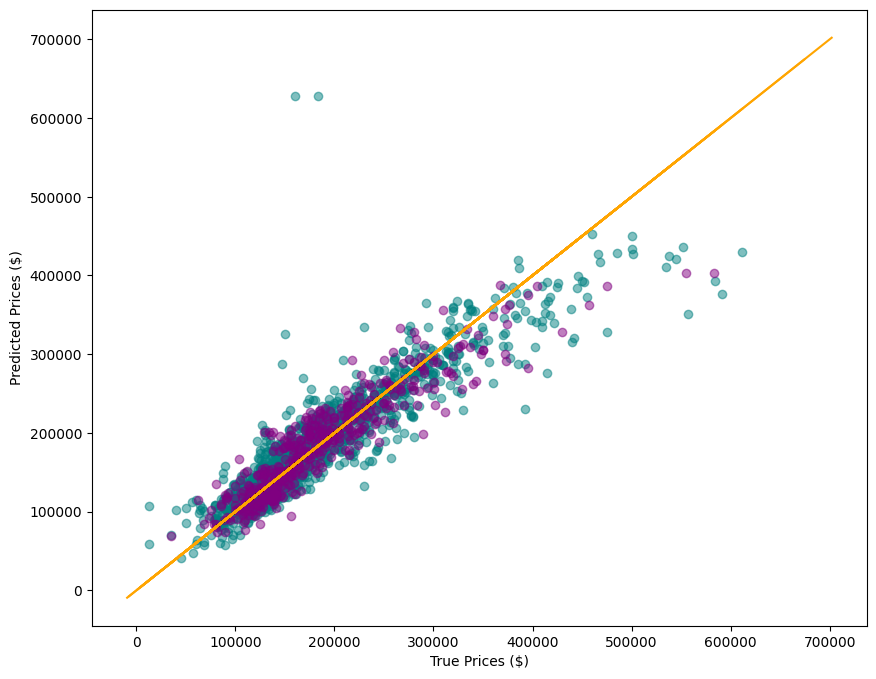

In [44]:
plt.figure(figsize = (10,8))
plt.scatter(y_train, y_train_preds, alpha = 0.5, c = 'teal')
plt.scatter(y_test, y_test_preds, alpha = 0.5, c = 'purple')
plt.plot([ys, y_preds], [ys, y_preds], color = 'orange')
plt.xlabel('True Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.savefig('../images/num_and_ord_with_interaction_true_vs_predicted.png', dpi = 300);

This time, our lingering cluster of points toward the right side of the plot has definitively moved closer to the line of equality, suggesting that we are making progress. Even still, there appears to be a curve. We will certainly want to scale the data, but perhaps we can incorporate some more categorical features first.

In [45]:
# Fit against the whole training set
mlr_num_ord_inter.fit(X,y)

# Predict using model
preds = mlr_num_ord_inter.predict(ames_validation[num_and_ord_with_interaction])

In [46]:
predictions = ames_validation.copy()
predictions['SalePrice'] = preds
predictions = predictions[['Id', 'SalePrice']]

In [47]:
predictions.set_index('Id', inplace = True)
predictions.to_csv('../outputs/prediction_on_numerical_and_ordinal_features_with_interaction.csv')

## Incorporating Additional Categorical Features
Non-ordinal categorical variables will need to be **One-Hot Encoded** in order to incorporate them into a regression model. As one might clearly see by inspecting the data dictionary, we have a plethora of such variables, each with multiple different categories. If we were to one-hot encode all of them, the amount of resulting data would be monstrous, so we will have to take a more tailored approach to determine which categorical variables are worth one-hot encoding. Recall first the 12 group taxonomy we detailed for the data at the beginning:

* Identifying Information and Access (ID, PID, Lot Frontage, Street, Alley)
* Building Classification (MS SubClass, Bldg Type, House Style, Year Built, Year Remodeled, Roof Style)
* Lot (Lot Area, Lot Shape, Land Contour, Lot Config, Land Slope)
* Location (Neighborhood, Condition 1, Condition 2)
* General (Overall Quality, Overall Condition)
* Exterior (Exterior 1st, Exterior 2nd, Exterior Quality, Exterior Condition, Paved Driveway, Miscellaneous Feature, Miscellaneous Value)
* Structure (Type of Foundation, Roof Material, Masonry Veneer Type, Masonry Veneer Area, Utilities, Heating, Heating Quality, Central Air, Electrical)
* Basement (Basement Quality, Basement Condition, Basement Exposure, Basement Finish Type 1, Basement Finish Type 2, Basement Square Footage Type 1, Basement Square Footage Type 2, Basement Unfinished Square Footage, Total Basement Square Footage)
* Rooms Above Grade (Total Rooms Above Grade, Bedrooms Above Grade, Kitchens Above Grade, Kitchen Quality)
* Fireplaces (Fireplaces, Fireplace Quality)
* Garages (Garage Type, Garage Year Built, Garage Finish, Garage Cars, Garage Area, Garage Quality, Garage Condition)
* Yard (Wood Deck Square Footage, Open Porch Square Footage, 3 Season Porch, Screen Porch, Pool Area, Pool Quality)

Eliminating the numerical and ordinal features, we are left with the following:

| Group | Features |
|---|---|
| Identifying Information and Access | Street, Alley |
| Building Classification | MS Subclass, Bldg Type, House Style, Roof Style |
| Lot | Lot Shape, Land Contour, Lot Config, Land Slope |
| Location | Neighborhood, Condition 1, Condition 2 |
| Exterior | Exterior 1st, Exterior 2nd, Paved Driveway, Miscellaneous Feature, Miscellaneous Value |
| Structure | Type of Foundation, Roof Material, Masonry Veneer Type, Utilities, Heating, Central Air, Electrical |
| Garages | Garage Type, Garage Finish |

We can exclude certain features from our analysis immediately by referring to the data dictionary. For one, street and alley types will be relatively uniform, so we need not include them. The `MS SubClass` feature is superseded by many of the other classification features. Due to the amount of information packed into each element of `MS SubClass`, it makes far more sense to discard it in favor of more granular features, controlling things like the number of stories, the architectural style, and the year. We can also neglect the lot information entirely. While there may be slight variations in price for flatter, regular lots, the difference will be negligible, as houses are typically designed and constructed to accommodate the lots upon which they are built. While the neighborhood can often have an impact, proximity to a main road is typically less of a variational factor, with the exception of noise. In a smaller town like Ames, where the residential districts are separated significantly from the main highways, it will not be a significant differentiating factor. With respect to garages, the garage type and finish will tend to have too little variability to make an impact. While the miscellaneous features might add value, there are so few of them that it is not worth including them in our model. Finally, we can neglect details buyers will not see regarding structure, namely the type of foundation and masonry veneer type. All in all, we are left with only the following categorical features to incorporate:

| Group | Features |
| -- | -- |
| Building Classification | Bldg Type, House Style, Roof Style |
| Location | Neighborhood |
| Exterior | Exterior 1st, Exterior 2nd, Paved Driveway |
| Structure | Roof Material, Utilities, Heating, Central Air, Electrical |

Let's one-hot encode each of these, check for correlations within each group, minimize colinearity, and create another model.

In [48]:
display(ames_training.head())
display(ames_validation.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Exter Qual,Fireplace Index,Garage Space
0,109,533352170,60,RL,NaN,13517,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,NV,NV,0,3,2010,WD,130500,16,0,950.0
1,544,531379050,60,RL,43.0,11492,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,NV,NV,0,4,2009,WD,220000,16,3,1118.0
2,153,535304180,20,RL,68.0,7922,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,NV,NV,0,1,2010,WD,109000,12,0,246.0
3,318,916386060,60,RL,73.0,9802,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NV,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,NV,NV,0,4,2010,WD,174000,9,0,800.0
4,255,906425045,50,RL,82.0,14235,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NV,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,0,NV,NV,0,3,2010,WD,138500,9,0,968.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Kitchen Exter Qual,Fireplace Index,Garage Space
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NV,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,0,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,0,NV,NV,0,4,2006,WD,6,0,440
1,2718,905108090,90,RL,0.0,9662,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NV,0.0,3,3,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,0,NV,NV,0,8,2006,WD,9,0,1160
2,2414,528218130,60,RL,58.0,17104,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NV,0.0,4,3,PConc,4,4,3,6,554,1,0,100,654,GasA,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,4,Attchd,2006.0,RFn,2,426,3,3,Y,100,24,0,0,0,0,0,NV,NV,0,9,2006,New,16,4,852
3,1989,902207150,30,RM,60.0,8520,Pave,NV,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NV,0.0,4,3,CBlock,3,3,1,1,0,1,0,968,968,GasA,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,0,Detchd,1935.0,Unf,2,480,2,3,N,0,0,184,0,0,0,0,NV,NV,0,7,2007,WD,12,0,960
4,625,535105100,20,RL,0.0,9500,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,1,0,785,1394,GasA,4,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,4,Attchd,1963.0,RFn,2,514,3,3,Y,0,76,0,0,185,0,0,NV,NV,0,7,2009,WD,9,8,1028


In [49]:
# Define categorical features of interest
categorical_features = ['Bldg Type', 'House Style', 'Roof Style', 'Neighborhood', 'Exterior 1st', 'Exterior 2nd',
                        'Paved Drive', 'Roof Matl', 'Utilities', 'Heating', 'Central Air', 'Electrical']

# Apply pd.get_dummies() to one-hot encode the categorical features
cat_vars_train_oh = pd.get_dummies(data = ames_training, columns = categorical_features, drop_first = True, dtype = int)
cat_vars_validation_oh = pd.get_dummies(data = ames_validation, columns = categorical_features, drop_first = True, dtype = int)

In [50]:
# Concatenate the dummified columns to the original datasets
ames_training = pd.concat([ames_training, cat_vars_train_oh])
ames_validation = pd.concat([ames_validation, cat_vars_validation_oh])

ames_training.drop(columns = categorical_features)
ames_validation.drop(columns = categorical_features)

# Check our work
display(ames_training.head())
display(ames_validation.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Exter Qual,Fireplace Index,Garage Space,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Paved Drive_P,Paved Drive_Y,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Utilities_NoSeWa,Utilities_NoSewr,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,109,533352170,60,RL,NaN,13517,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,NV,NV,0,3,2010,WD,130500,16,0,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,544,531379050,60,RL,43.0,11492,Pave,NV,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,NV,NV,0,4,2009,WD,220000,16,3,1118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Kitchen Exter Qual,Fireplace Index,Garage Space,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Paved Drive_P,Paved Drive_Y,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Utilities_NoSewr,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_NV,Electrical_SBrkr
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NV,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,0,Detchd,1910.0,Unf,1,440,1,1,Y,0,60,112,0,0,0,0,NV,NV,0,4,2006,WD,6,0,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2718,905108090,90,RL,0.0,9662,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NV,0.0,3,3,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1977.0,Fin,2,580,3,3,Y,170,0,0,0,0,0,0,NV,NV,0,8,2006,WD,9,0,1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2414,528218130,60,RL,58.0,17104,Pave,NV,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompS

Unfortunately, efforts to one-hot encode the data using both `pandas` and `sklearn` have failed, as the resulting columns only populate with NaNs. In the interest of time, we will shift away from this effort and note that there may have been a valuable contribution from categorical data if we had successfully debugged the one-hot encoding issue.

## Scaling - The Final Attempt
Now we come to the final pre-processing step and perhaps the one procedure that may lead to great improvement in our predictive ability: scaling. We have mentioned a few times now that scaling appears to be necessary due to the curving tail on the right end of our plots comparing the true and predicted price values. In reality, the curve appears to be something like a square root and we believe this to be the case because the features included in our regression models are on such different scales. If we scale all of our features of interest using the `StandardScaler()`, we can renormalize and recenter, allowing the parameters of the model to adjust in a way that provides a "fairer" contribution from each feature. We apply the same procedure we learned in Lesson 304 - Feature Engineering, with some modification. To ensure that our testing data is not affecting our training data, we will perform a train-test split first, then transform the data.

In [51]:
# Specify X and y
X = ames_training[num_and_ord_with_interaction]
y = ames_training['SalePrice']

# Instantiate our linear regression model
mlr_num_ord_inter = LinearRegression()

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
# Instantiate my transformer
standard_scaler = StandardScaler()

# Fit *and* transform my X data
Z_train = standard_scaler.fit_transform(X_train)
Z_test = standard_scaler.fit_transform(X_test)

# Fit the model
mlr_num_ord_inter.fit(Z_train, y_train)

LinearRegression()

In [53]:
y_train_preds = mlr_num_ord_inter.predict(Z_train)
y_test_preds = mlr_num_ord_inter.predict(Z_test)

print(f'RMS Error on the training set: {rmse(y_train, y_train_preds)}')
print(f'RMS Error on the testing set: {rmse(y_test, y_test_preds)}')
print(f'R^2 on the training set: {mlr_num_ord_inter.score(Z_train, y_train)}')
print(f'R^2 on the testing set: {mlr_num_ord_inter.score(Z_test, y_test)}')

RMS Error on the training set: 32117.751000754026
RMS Error on the testing set: 38198.96319132846
R^2 on the training set: 0.8427940334285622
R^2 on the testing set: 0.7139381310053727


Scaling appears to have made a slight amount of a difference, though not as much as we would have liked. Across all of our models, we have accounted for 80\% of the variability in the model with the features in the training set and consistently done better on the testing set. Were more time available, the next step would be to regularize using `LassoCV`.

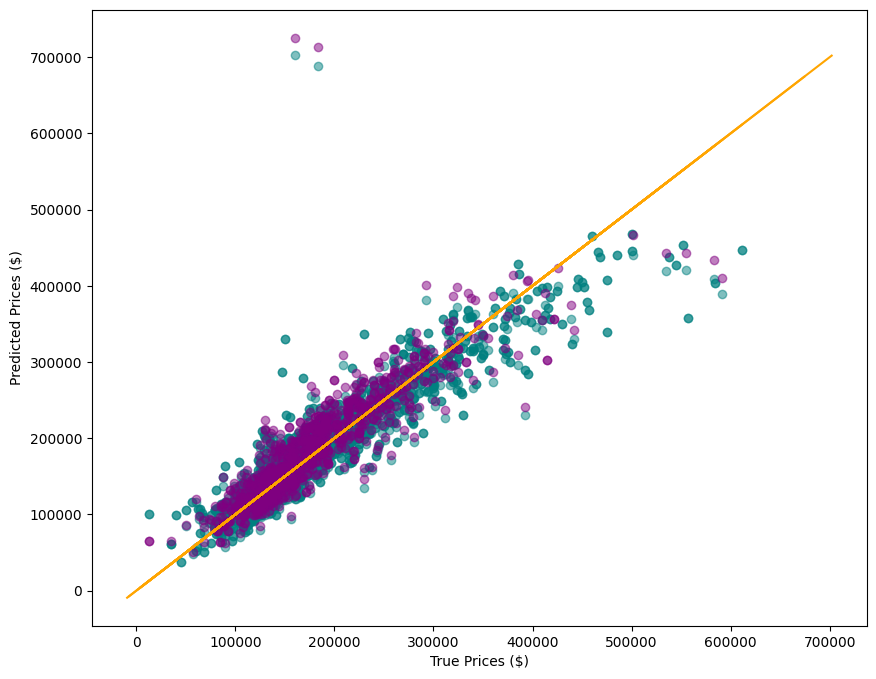

In [54]:
plt.figure(figsize = (10,8))
plt.scatter(y_train, y_train_preds, alpha = 0.5, c = 'teal')
plt.scatter(y_test, y_test_preds, alpha = 0.5, c = 'purple')
plt.plot([ys, y_preds], [ys, y_preds], color = 'orange')
plt.xlabel('True Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.savefig('../images/scaled_true_vs_predicted.png', dpi = 300);

The lingering tail has widened, counter to our observation from our R^2 scores. We'll submit this to Kaggle anyway, just in case this turns out to be better on the data we can't see.

In [55]:
# Fit against the whole training set
mlr_num_ord_inter.fit(X,y)

# Predict using model
preds = mlr_num_ord_inter.predict(ames_validation[num_and_ord_with_interaction])

In [56]:
predictions = ames_validation.copy()
predictions['SalePrice'] = preds
predictions = predictions[['Id', 'SalePrice']]

In [57]:
predictions.set_index('Id', inplace = True)
predictions.to_csv('../outputs/prediction_on_numerical_and_ordinal_features_with_interaction_scaled.csv')

It appears data has been written twice somewhere in this prediction, so we are unable to submit it.